In [1]:
from skimage import data

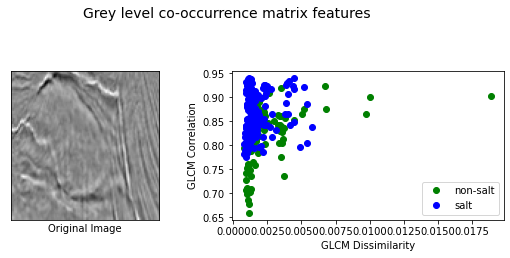

In [2]:
import matplotlib.pyplot as plt

from skimage.feature import greycomatrix, greycoprops
from skimage import data
import cv2

PATCH_SIZE = 31
import imagehelper
image_paths = imagehelper.get_image_files()
image_paths2 = imagehelper.get_image_mask()
# open the camera image
image = cv2.cvtColor(cv2.imread(image_paths[80]), cv2.COLOR_BGR2GRAY)
image2 = cv2.cvtColor(cv2.imread(image_paths2[80]), cv2.COLOR_BGR2GRAY)
# select some patches from grassy areas of the image
grass_locations=[]
sky_locations=[]
for i1 in range(int(image.shape[0]/5)):
    for j1 in range(int(image.shape[1]/5)):
        i=i1*5
        j=j1*5
        if(image2[i,j]==0):
            grass_locations.append((i,j))
        if(image2[i,j]==255):
            sky_locations.append((i,j))
#grass_locations = [(20, 70), (40, 80)]
grass_patches = []
for loc in grass_locations:
    grass_patches.append(image[loc[0]:loc[0] + PATCH_SIZE,
                               loc[1]:loc[1] + PATCH_SIZE])

# select some patches from sky areas of the image
#sky_locations = [(20, 10), (41, 10)]
sky_patches = []
for loc in sky_locations:
    sky_patches.append(image[loc[0]:loc[0] + PATCH_SIZE,
                             loc[1]:loc[1] + PATCH_SIZE])

# compute some GLCM properties each patch
xs = []
ys = []
for patch in (grass_patches + sky_patches):
    glcm = greycomatrix(patch, distances=[1], angles=[90], levels=256,
                        symmetric=True, normed=True)
    xs.append(greycoprops(glcm, 'ASM')[0, 0])
    ys.append(greycoprops(glcm, 'correlation')[0, 0])

# create the figure
fig = plt.figure(figsize=(8, 8))

# display original image with locations of patches
ax = fig.add_subplot(3, 2, 1)
ax.imshow(image, cmap=plt.cm.gray,
          vmin=0, vmax=255)
#for (y, x) in grass_locations:
#    ax.plot(x + PATCH_SIZE / 2, y + PATCH_SIZE / 2, 'gs')
#for (y, x) in sky_locations:
#    ax.plot(x + PATCH_SIZE / 2, y + PATCH_SIZE / 2, 'bs')
ax.set_xlabel('Original Image')
ax.set_xticks([])
ax.set_yticks([])
ax.axis('image')

# for each patch, plot (dissimilarity, correlation)
ax = fig.add_subplot(3, 2, 2)
ax.plot(xs[:len(grass_patches)], ys[:len(grass_patches)], 'go',
        label='non-salt')
ax.plot(xs[len(grass_patches):], ys[len(grass_patches):], 'bo',
        label='salt')
ax.set_xlabel('GLCM Dissimilarity')
ax.set_ylabel('GLCM Correlation')
ax.legend()

# display the image patches
#for i, patch in enumerate(grass_patches):
#    ax = fig.add_subplot(3, len(grass_patches), len(grass_patches)*1 + i + 1)
#    ax.imshow(patch, cmap=plt.cm.gray,
#              vmin=0, vmax=255)
#    ax.set_xlabel('Grass %d' % (i + 1))

#for i, patch in enumerate(sky_patches):
#    ax = fig.add_subplot(3, len(sky_patches), len(sky_patches)*2 + i + 1)
#    ax.imshow(patch, cmap=plt.cm.gray,
#              vmin=0, vmax=255)
#    ax.set_xlabel('Sky %d' % (i + 1))


# display the patches and plot
fig.suptitle('Grey level co-occurrence matrix features', fontsize=14, y=1.05)
plt.tight_layout()
plt.show()

In [3]:
print(image2)

[[  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 ...
 [255 255 255 ...   0   0   0]
 [255 255 255 ...   0   0   0]
 [255 255 255 ...   0   0   0]]


In [4]:
print(grass_locations)

[(0, 0), (0, 5), (0, 10), (0, 15), (0, 20), (0, 25), (0, 45), (0, 50), (0, 55), (0, 60), (0, 65), (0, 70), (0, 75), (0, 80), (0, 85), (0, 90), (0, 95), (5, 0), (5, 5), (5, 10), (5, 15), (5, 20), (5, 50), (5, 55), (5, 60), (5, 65), (5, 70), (5, 75), (5, 80), (5, 85), (5, 90), (5, 95), (10, 0), (10, 5), (10, 10), (10, 15), (10, 65), (10, 70), (10, 75), (10, 80), (10, 85), (10, 90), (10, 95), (15, 0), (15, 5), (15, 10), (15, 15), (15, 75), (15, 80), (15, 85), (15, 90), (15, 95), (20, 0), (20, 5), (20, 10), (20, 15), (20, 75), (20, 80), (20, 85), (20, 90), (20, 95), (25, 0), (25, 5), (25, 10), (25, 75), (25, 80), (25, 85), (25, 90), (25, 95), (30, 0), (30, 5), (30, 10), (30, 75), (30, 80), (30, 85), (30, 90), (30, 95), (35, 0), (35, 5), (35, 10), (35, 75), (35, 80), (35, 85), (35, 90), (35, 95), (40, 0), (40, 75), (40, 80), (40, 85), (40, 90), (40, 95), (45, 80), (45, 85), (45, 90), (45, 95), (50, 80), (50, 85), (50, 90), (50, 95), (55, 80), (55, 85), (55, 90), (55, 95), (60, 80), (60, 85)